In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler

In [5]:
import quandl
quandl.ApiConfig.api_key = 'k4yGHkTF59h4ueMXmsst'

## LOG RETURN FUNCTIONS

In [6]:
def getLogReturns(dataList):
    logReturns = []
    for t in range(len(dataList)-1):
        logReturn = np.log(dataList[t+1]) - np.log(dataList[t])
        logReturns.append(logReturn)
    return logReturns

def generateLogReturns(data):
    logReturns = []
    for stock in data:
        pdStock = pd.DataFrame(stock)
        logReturns.append(getLogReturns(pdStock['Close']))
    return pd.DataFrame(logReturns)

## QUANDL API 

In [8]:
def getQuandlData(qdbname, symbols, startDate, endDate):
    data = []
    qdbname = "EOD/"
    for symbol in symbols:
        tablename = qdbname + symbol
        importdata = quandl.get(tablename, start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")
        data.append(importdata)
    return data

## PLOTTING

In [15]:
def plotPCA(principalDf, colors):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    ax.scatter(principalDf['component 1'], principalDf['component 2'], c= gColors)
    ax.grid()
    return

## Classification

In [20]:
def classifyGMM(principalDf):
    gmm = GaussianMixture(n_components = 3) 
    gmm.fit(principalDf)
    gLabels = gmm.predict(principalDf)
    gColors = []
    index = 0
    for label in gLabels:
        if label == 0:
            gColors.append("r")
            plt.plot(logReturns[index], c = "r")
        if label == 1:
            gColors.append("g")
            plt.plot(logReturns[index], c = "g")
        if label == 2:
            gColors.append("b")
            plt.plot(logReturns[index], c = "b")
        index+= 1
    return gLabels, gColors

## RESULTS

In [81]:
tickerSymbols = ["HD","DIS","MSFT","BA","MMM","PFE","NKE","JNJ","MCD","INTC","CSCO","IBM","V","JPM","AXP", "XOM", "GS", "JPM", "UNH","PG", "GE", "KO", "CVX", "CAT", "MRK", "WMT", "VZ", "UTX", "TRV", "AAPL"]
tsCount = len(tickerSymbols)

startDate = "2016-1-1"
endDate = "2016-12-31"

data = getQuandlData("EOD/", tickerSymbols, startDate, endDate)

logReturns = generateLogReturns(data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(logReturns)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])

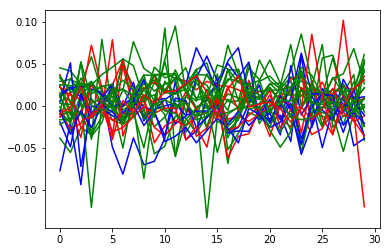

In [83]:
gLables, gColors = classifyGMM(principalDf)

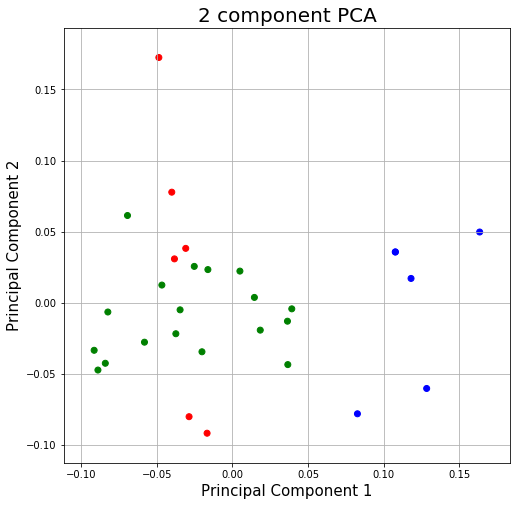

In [84]:
'''
["HD","DIS","MSFT","BA","MMM","PFE","NKE","JNJ","MCD","INTC","CSCO","IBM","V","JPM","AXP"]
retail : r
entertainment : y
tech : b
financial : g
pharm : m
utility : c
misc : k
'''
colors = ["r","k","b","c","c","m","r","m","k","b","b","b","c","g","g"]
plotPCA(principalDf, gColors)

In [96]:
combined = pd.DataFrame(data= tickerSymbols, columns = ['name'])
combined['PC1'] = principalDf['component 1'] 
combined['PC2'] = principalDf['component 2'] 
combined['groups'] = gLables
print(combined.sort_values('groups'))

    name       PC1       PC2  groups
29  AAPL -0.048691  0.172407       0
22   CVX -0.028700 -0.079960       0
6    NKE -0.038378  0.030918       0
9   INTC -0.040146  0.077783       0
12     V -0.030911  0.038303       0
15   XOM -0.016779 -0.091577       0
27   UTX  0.036410 -0.012867       1
26    VZ -0.089008 -0.047192       1
25   WMT -0.046692  0.012518       1
24   MRK  0.004945  0.022332       1
21    KO -0.084120 -0.042429       1
20    GE  0.018408 -0.019149       1
19    PG -0.082439 -0.006410       1
18   UNH  0.014528  0.003836       1
0     HD -0.016245  0.023395       1
11   IBM  0.036638 -0.043358       1
10  CSCO -0.025259  0.025641       1
8    MCD -0.091510 -0.033312       1
7    JNJ -0.058208 -0.027616       1
5    PFE -0.037444 -0.021676       1
4    MMM -0.020163 -0.034352       1
2   MSFT -0.069445  0.061393       1
1    DIS  0.039267 -0.004185       1
28   TRV -0.034641 -0.004888       1
13   JPM  0.107794  0.035772       2
16    GS  0.163584  0.049791       2
1

## Trying to explain components

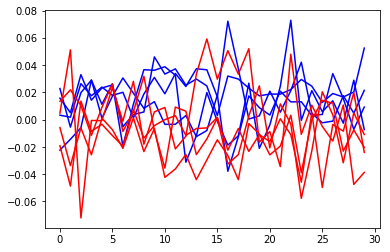

In [85]:
sortedP1 = (principalDf.sort_values(by = "component 1")).index
fig = plt.figure(figsize = (6,4))
sub1 = fig.add_subplot(1,1,1)
sub1.plot(logReturns[sortedP1[0]], c = "b")
sub1.plot(logReturns[sortedP1[1]], c = "b")
sub1.plot(logReturns[sortedP1[2]], c = "b")
sub1.plot(logReturns[sortedP1[3]], c = "b")
sub1.plot(logReturns[sortedP1[tsCount - 4]], c = "r")
sub1.plot(logReturns[sortedP1[tsCount - 3]], c = "r")
sub1.plot(logReturns[sortedP1[tsCount - 2]], c = "r")
sub1.plot(logReturns[sortedP1[tsCount - 1]], c = "r")

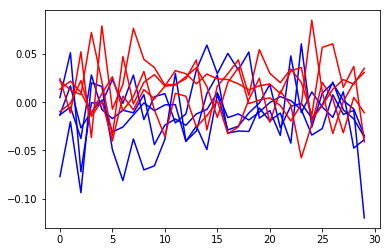

In [86]:
sortedP2 = (principalDf.sort_values(by = "component 2")).index
fig = plt.figure(figsize = (6,4))
sub2 = fig.add_subplot(1,1,1)
sub2.plot(logReturns[sortedP2[0]], c = "b")
sub2.plot(logReturns[sortedP2[1]], c = "b")
sub2.plot(logReturns[sortedP2[2]], c = "b")
sub2.plot(logReturns[sortedP2[3]], c = "b")
sub2.plot(logReturns[sortedP2[tsCount - 4]], c = "r")
sub2.plot(logReturns[sortedP2[tsCount - 3]], c = "r")
sub2.plot(logReturns[sortedP2[tsCount - 2]], c = "r")
sub2.plot(logReturns[sortedP2[tsCount - 1]], c = "r")